In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def CriarSistema(n,M,f=np.array(1),eq=0):
    N = 2*n+1
    k = 1 + (2*np.random.random_sample(N+1)-1)*0.01
    A = np.zeros((N,N))
    b = np.zeros((N,f.size))
    for i in range(N):
        A[i,i] = -(k[i]+k[i+1])
    for i in range(N-1):
        A[i,i+1] = k[i+1]
        A[i+1,i] = k[i+1]
    if eq:
        b[n,:] -= f
    else: 
        A[n,:] /= M
    b[-1,:] = -k[-1]
    return A, b

def LinEQSolver(A,b,method="TGJ"):
    T = b.shape
    n = T[0]
    M = np.zeros((n,n+T[1]))
    M[:,:n] = A
    M[:,n:] = b
    if method == "TGJ":
        for i in range(n):
            Max = np.argmax(abs(M[:,i]))
            M[[i,Max],:] = M[[Max,i],:]
            M[i,:] /= M[i,i]

            M[i+1:,:] -= np.outer(M[i+1:,i],M[i,:])
            M[:i,:] -= np.outer(M[:i,i],M[i,:])
        return M[:,n:]


    

In [10]:
LinEQSolver(np.array([[1,2,3],
                      [3,-3,4],
                      [9,1,2]]),np.array([[0,0,2],
                                          [9,9,1]]).T)

array([[ 0.24285714, -0.58571429],
       [ 0.07142857,  0.35714286],
       [-0.12857143,  2.95714286]])

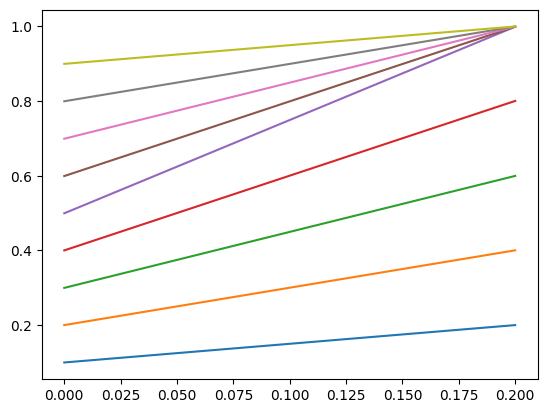

In [11]:
F = np.linspace(0,0.2,10)
M = 5
n = 4
Args = CriarSistema(n,M,F,1)
Xeq = LinEQSolver(Args[0],Args[1])
plt.plot(F,Xeq.T)
plt.show()

In [12]:
A1 = CriarSistema(5,1)[0]
print((A1-A1.T==0).all())
A2 = CriarSistema(5,2)[0]
print((A2-A2.T==0).all())

True
False


In [28]:
def QRdecomposition(A,method = "GramSchmidt"):
    N = A.shape[0]
    if method == "GramSchmidt":
        Q = np.zeros((N,N))
        R = np.zeros((N,N))
        for i in range(N):
            R[:i,i] = np.matmul(A[:,i],Q[:,:i])
            u = A[:,i] - np.sum(R[:i,i]*Q[:,:i],axis=1)
            R[i,i] = np.linalg.norm(u)
            Q[:,i] = u/R[i,i]
        return Q,R
    
def Eigen(A,errmin):
    N = A.shape[0]
    Q = np.identity(N)
    M = np.copy(A)
    n = 0
    while True:
        Q = np.matmul(Q,QRdecomposition(M)[0])
        M = np.matmul(Q.T,np.matmul(A,Q))
        Diag = np.identity(N)*np.diagonal(M)
        if (np.abs(M-Diag)<errmin).all() or n >=1000:
            break
        n +=1
    return Q, M

In [29]:
np.set_printoptions(precision=2,suppress=True)
print(Eigen(A1,1e-6)[1])
print(Eigen(A2,1e-6)[1])

[[-3.93  0.    0.    0.    0.   -0.   -0.   -0.    0.    0.   -0.  ]
 [ 0.   -3.73  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.   -3.41  0.   -0.   -0.   -0.    0.   -0.   -0.    0.  ]
 [ 0.   -0.    0.   -3.   -0.    0.   -0.    0.   -0.    0.   -0.  ]
 [ 0.    0.   -0.   -0.   -2.51  0.   -0.   -0.   -0.    0.   -0.  ]
 [ 0.    0.   -0.   -0.   -0.   -2.   -0.   -0.   -0.   -0.    0.  ]
 [-0.   -0.   -0.   -0.    0.    0.   -1.48  0.   -0.   -0.   -0.  ]
 [-0.   -0.    0.    0.   -0.    0.    0.   -1.   -0.   -0.   -0.  ]
 [ 0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.58 -0.    0.  ]
 [ 0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.   -0.27 -0.  ]
 [-0.    0.   -0.   -0.   -0.    0.   -0.    0.   -0.    0.   -0.07]]
[[-3.77 -0.    0.01 -0.   -0.04 -0.    0.08  0.   -0.14 -0.    0.2 ]
 [ 0.   -3.73  0.   -0.   -0.   -0.    0.01  0.   -0.01 -0.    0.02]
 [-0.    0.   -3.13  0.    0.05  0.   -0.12 -0.    0.22  0.   -0.33]
 [ 0.   -0.   -0.   -3.   -0.   -

In [ ]:
def LUdecomposition(Mat):
    
    N = Mat.shape[0]
    U = np.copy(Mat)
    L = np.identity(N,Mat.dtype)
    P = np.identity(N,Mat.dtype)

    for i in range(N-1): 
        Max = np.argmax(abs(U[:,i]))
        U[[i,Max],:] = U[[Max,i],:]
        P[[i,Max],:] = P[[Max,i],:]
        mul = U[i+1:,i]/U[i,i]
        U[i+1:,:] -= np.outer(mul,U[i,:])
        L[i+1:,i] = mul
    return P,L,U